In [1]:
%matplotlib inline
import fair  #import FAIR

In [2]:
fair.__version__  #confirm FAIR version

'1.5'

In [3]:
import numpy as np  #other settings
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline
os.chdir('/Users/seaverwang/Documents/Tipping points/carbon figure resources/')
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
from fair.forward import fair_scm  #import FAIR engine

In [5]:
emissionsdata = pd.read_csv('emissions_scenarios.csv')
#type(emissionsdata)

In [6]:
emissionsdata.head() #we have two scenarios, the second is Zeke's new BAU scenario. Units in Mt CO2

,SSP2_4.5_emissionstotal,NewBAU_IEA_emissionstotal
0,30068.13125,30068.13125
1,30025.26579,30025.26579
2,31271.59400,31271.59400
3,32735.70201,32735.70201
4,33862.72637,33862.72637


In [7]:
from fair.RCPs import rcp26, rcp45, rcp60, rcp85
from fair.ancil import natural, cmip6_volcanic, cmip6_solar#, historical_scaling
#convert units of emissions into Gt C from Mt CO2

emissionsdata=emissionsdata.copy()*0.272727/1000

emissionsdata_NewBAU_IEA=emissionsdata.to_numpy()[:,1]
emissionsdata_NewBAU_IEA[0:5]

array([8.20039123, 8.18870066, 8.52860802, 8.9279098 , 9.23527977])

In [8]:
rcp45.Emissions.emissions[265:270,1]# dates from 2030-2034

array([10.9533 , 10.99177, 11.03024, 11.06871, 11.10718])

In [9]:
rcp85.Emissions.emissions[265:270,1]# dates from 2030-2034

array([13.8391 , 14.13385, 14.4286 , 14.72335, 15.0181 ])

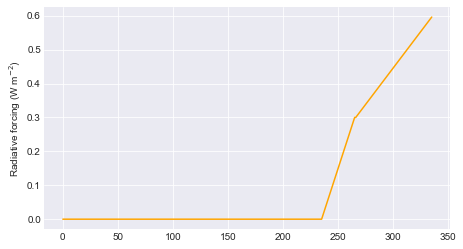

In [10]:
from scipy.stats import gamma

natural_short=natural.Emissions.emissions[0:336].copy()
cmip6_volcanic_short=cmip6_volcanic.Forcing.volcanic[0:336].copy()
cmip6_solar_short=cmip6_solar.Forcing.solar[0:336].copy()
#historical_scaling_short=

#RCP 4.5
emissions45=rcp45.Emissions.emissions[0:336].copy()

#RCP 4.5 with tipping points
emissions45_TIPP=rcp45.Emissions.emissions[0:336].copy()

#add tipping points from land use, specify CO2 from tipping points, GtC/yr

emissions45_TIPP[235:336,2]=emissions45_TIPP[235:336,2].copy()+0.667+0.039+0.494+1.078#
#emissionsBAUtipping[:,2]=emissionsBAUtipping[:,2]+1.074#gradual thaw CO2, constant flux from 2020 to 2100
#emissionsBAUtipping[:,2]=emissionsBAUtipping[:,2]+0.014#abrupt thaw CO2, constant flux from 2020 to 2100
#emissionsBAUtipping[:,2]=emissionsBAUtipping[:,2]+0.490#boreal forest CO2, constant flux from 2020 to 2100
#emissionsBAUtipping[150:221,2]=emissionsBAUtipping[150:221,2]+1.078#Amazon forest CO2, constant flux from 2020 to 2070

# specify methane in this example, Mt/yr
# emissions[:,3] = 300.

emissions45_TIPP[235:336,3]=emissions45_TIPP[235:336,3].copy()+13.58+70.74+5.84#
#emissionsBAUtipping[:,3]=emissionsBAUtipping[:,3]+13.58#methane, gradual thaw, constant flux from 2020 to 2100
#emissionsBAUtipping[:,3]=emissionsBAUtipping[:,3]+82.93#methane, abrupt thaw, constant flux from 2020 to 2100
#emissionsBAUtipping[:,3]=emissionsBAUtipping[:,3]+5.84#methane, methane hydrates, constant flux from 2020 to 2100
# emissions[:,5] = 0.1*np.arange(250)   # SOx




#RCP 8.5
emissions85=rcp85.Emissions.emissions[0:336].copy()

#RCP 8.5 with tipping points
emissions85_TIPP=rcp85.Emissions.emissions[0:336].copy()

#add tipping points from land use, specify CO2 from tipping points, GtC/yr

emissions85_TIPP[235:336,2]=emissions85_TIPP[235:336,2].copy()+1.074+0.141+0.494+1.078#
#emissionsBAUtipping[:,2]=emissionsBAUtipping[:,2]+1.074#gradual thaw CO2, constant flux from 2020 to 2100
#emissionsBAUtipping[:,2]=emissionsBAUtipping[:,2]+0.014#abrupt thaw CO2, constant flux from 2020 to 2100
#emissionsBAUtipping[:,2]=emissionsBAUtipping[:,2]+0.490#boreal forest CO2, constant flux from 2020 to 2100
#emissionsBAUtipping[150:221,2]=emissionsBAUtipping[150:221,2]+1.078#Amazon forest CO2, constant flux from 2020 to 2070

# specify methane in this example, Mt/yr
# emissions[:,3] = 300.

emissions85_TIPP[235:336,3]=emissions85_TIPP[235:336,3].copy()+13.58+82.93+11.68#
#emissionsBAUtipping[:,3]=emissionsBAUtipping[:,3]+13.58#methane, gradual thaw, constant flux from 2020 to 2100
#emissionsBAUtipping[:,3]=emissionsBAUtipping[:,3]+82.93#methane, abrupt thaw, constant flux from 2020 to 2100
#emissionsBAUtipping[:,3]=emissionsBAUtipping[:,3]+5.84#methane, methane hydrates, constant flux from 2020 to 2100
# emissions[:,5] = 0.1*np.arange(250)   # SOx




#rows from 
#the year 2000 AD is indexed at row 235 (w zero indexing). 
#The year 2100 is row 335
# remember column zero is the years


#RCP4.5 - 0.3 W/m^2 by 2050, 0.4 W/m^2 by 2100
other_rf_ice = np.zeros(336)
for x in range(0, 234):
    other_rf_ice[x] = 0
for y in range(235, 286):
    other_rf_ice[y] = 0+(0.006 * (y-235))
for z in range(286, 336):
    other_rf_ice[z] = 0.3+(0.002 * (z-286))
    
# plot the output
#fig = plt.figure()
#ax1 = fig.add_subplot(221)
#ax1.plot(range(0, other_rf_ice.size), other_rf_ice, color='orange')
#ax1.set_ylabel('Radiative forcing (W m$^{-2}$)')

#RCP8.5 - RCP8.5 - 0.3 W/m^2 by 2030, 0.6 W/m^2 by 2100
other_rf_ice2 = np.zeros(336)
for x2 in range(0, 234):
    other_rf_ice2[x2] = 0
for y2 in range(235, 266):
    other_rf_ice2[y2] = 0+(0.01 * (y2-235))
for z2 in range(266, 336):
    other_rf_ice2[z2] = 0.3+(0.00429 * (z2-266))
    
# plot the output
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(range(0, other_rf_ice2.size), other_rf_ice2, color='orange')
ax1.set_ylabel('Radiative forcing (W m$^{-2}$)')

other_rf_ice3 = np.zeros(336)
for x3 in range(0, 234):
    other_rf_ice3[x3] = 6
for y3 in range(235, 266):
    other_rf_ice3[y3] = 6
for z3 in range(266, 336):
    other_rf_ice3[z3] = 6

In [11]:
len(other_rf_ice)

336

In [12]:
len(cmip6_volcanic_short)

336

In [13]:
rcp45.Emissions.emissions[265:270,2]# dates from 2030-2034

array([0.2163 , 0.21454, 0.21278, 0.21102, 0.20926])

In [14]:
emissions45[265:270,2]# Should be identical to the above

array([0.2163 , 0.21454, 0.21278, 0.21102, 0.20926])

In [15]:
emissions45_TIPP[265:270,2]-emissions45[265:270,2]# dates from 2030-2034. 2.278 Gt/yr extra CO2 is correct.

array([2.278, 2.278, 2.278, 2.278, 2.278])

In [16]:
emissions85_TIPP[265:270,2]-emissions85[265:270,2]# dates from 2030-2034. 2.787 Gt/yr extra CO2 is correct.


array([2.787, 2.787, 2.787, 2.787, 2.787])

In [17]:
emissions45_TIPP[265:270,3]-emissions45[265:270,3]# dates from 2030-2034, 90.16 Mt/yr extra CH4 is correct

array([90.16, 90.16, 90.16, 90.16, 90.16])

In [18]:
emissions85_TIPP[265:270,3]-emissions85[265:270,3]# dates from 2030-2034, 108.19 Mt/yr extra CH4 is correct

array([108.19, 108.19, 108.19, 108.19, 108.19])

In [19]:
# RCP runs
C45, F45, T45 = fair.forward.fair_scm(emissions=emissions45,natural=natural_short,F_volcanic=cmip6_volcanic_short,F_solar=cmip6_solar_short)
C45TIPP, F45TIPP, T45TIPP = fair.forward.fair_scm(emissions=emissions45_TIPP,natural=natural_short,F_volcanic=cmip6_volcanic_short,F_solar=cmip6_solar_short+other_rf_ice)
C85, F85, T85 = fair.forward.fair_scm(emissions=emissions85,natural=natural_short,F_volcanic=cmip6_volcanic_short,F_solar=cmip6_solar_short)
C85TIPP, F85TIPP, T85TIPP = fair.forward.fair_scm(emissions=emissions85_TIPP,natural=natural_short,F_volcanic=cmip6_volcanic_short,F_solar=cmip6_solar_short+other_rf_ice2)

# 

In [20]:
T45TIPP[-1]-T45[-1]

0.5024255111263658

In [21]:
T85TIPP[-1]-T85[-1]

0.5404011979702803

In [22]:
C45TIPP[-1,0]-C45[-1,0]

73.05018447770567

In [23]:
C85TIPP[-1,0]-C85[-1,0]

110.36287405525638

In [24]:
F45TOTAL=np.sum(F45, axis=1)

In [25]:
F45TOTALTIPP=np.sum(F45TIPP, axis=1)

In [26]:
F85TOTAL=np.sum(F85, axis=1)

In [27]:
F85TOTALTIPP=np.sum(F85TIPP, axis=1)

In [28]:
#F45[:,0]

In [29]:
#F45[:,1]

In [30]:
F45CO2CH4=F45[:,0]+F45[:,1]

In [31]:
#F45CO2CH4[-1]

In [32]:
F45CO2CH4TIPP=F45TIPP[:,0]+F45TIPP[:,1]

In [33]:
F85CO2CH4=F85[:,0]+F85[:,1]

In [34]:
F85CO2CH4TIPP=F85TIPP[:,0]+F85TIPP[:,1]

In [35]:
F45DIFF=F45TOTALTIPP-F45TOTAL

In [36]:
F85DIFF=F85TOTALTIPP-F85TOTAL

In [37]:
F45DIFF[-1]

1.041264397227324

In [38]:
F85DIFF[-1]

1.0948722026367612

In [39]:
F45GHGDIFF=F45CO2CH4TIPP-F45CO2CH4

In [40]:
F85GHGDIFF=F85CO2CH4TIPP-F85CO2CH4

In [41]:
F45GHGDIFF[-1]

0.8381143027821079

In [42]:
F85GHGDIFF[-1]

0.7481939156431583

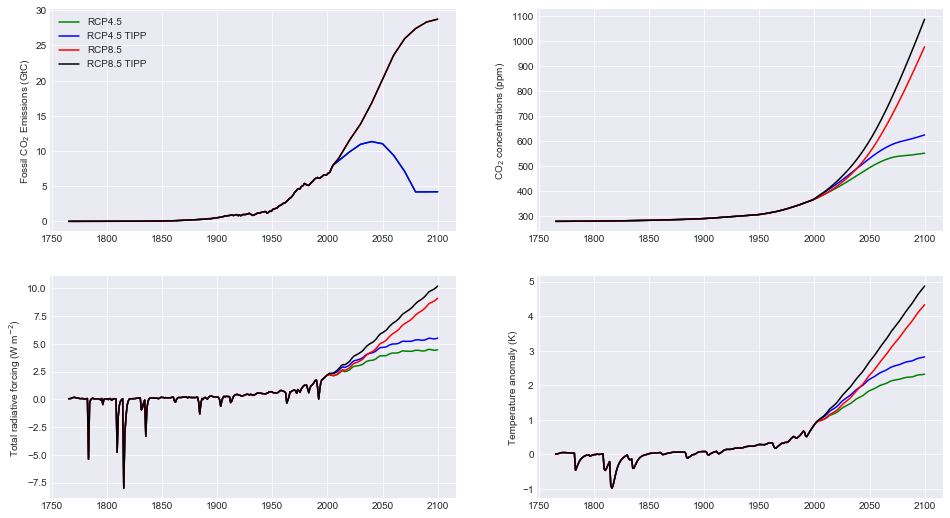

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(rcp45.Emissions.year[0:336], emissions45[:,1], color='green', label='RCP4.5')
ax2.plot(rcp45.Emissions.year[0:336], C45[:, 0], color='green')
ax3.plot(rcp45.Emissions.year[0:336], np.sum(F45, axis=1), color='green')
ax4.plot(rcp45.Emissions.year[0:336], T45, color='green')

ax1.plot(rcp45.Emissions.year[0:336], emissions45_TIPP[:,1], color='blue', label='RCP4.5 TIPP')
ax2.plot(rcp45.Emissions.year[0:336], C45TIPP[:, 0], color='blue')
ax3.plot(rcp45.Emissions.year[0:336], np.sum(F45TIPP, axis=1), color='blue')
ax4.plot(rcp45.Emissions.year[0:336], T45TIPP, color='blue')

ax1.plot(rcp60.Emissions.year[0:336], emissions85[:,1], color='red', label='RCP8.5')
ax2.plot(rcp60.Emissions.year[0:336], C85[:, 0], color='red')
ax3.plot(rcp60.Emissions.year[0:336], np.sum(F85, axis=1), color='red')
ax4.plot(rcp60.Emissions.year[0:336], T85, color='red')

ax1.plot(rcp85.Emissions.year[0:336], emissions85_TIPP[:,1], color='black', label='RCP8.5 TIPP')
ax2.plot(rcp85.Emissions.year[0:336], C85TIPP[:, 0], color='black')
ax3.plot(rcp85.Emissions.year[0:336], np.sum(F85TIPP, axis=1), color='black')
ax4.plot(rcp85.Emissions.year[0:336], T85TIPP, color='black')

ax1.set_ylabel('Fossil CO$_2$ Emissions (Gt C)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');

fig.savefig('RCPs_TIPP_HD.png', bbox_inches='tight', dpi=300)

In [ ]:
fig.savefig('RCPs_TIPP.png')

In [ ]:
# RCP runs
C45_noice, F45_noice, T45_noice = fair.forward.fair_scm(emissions=emissions45,natural=natural_short,F_volcanic=cmip6_volcanic_short,F_solar=cmip6_solar_short)
C45TIPP_noice, F45TIPP_noice, T45TIPP_noice = fair.forward.fair_scm(emissions=emissions45_TIPP,natural=natural_short,F_volcanic=cmip6_volcanic_short,F_solar=cmip6_solar_short)
C85_noice, F85_noice, T85_noice = fair.forward.fair_scm(emissions=emissions85,natural=natural_short,F_volcanic=cmip6_volcanic_short,F_solar=cmip6_solar_short)
C85TIPP_noice, F85TIPP_noice, T85TIPP_noice = fair.forward.fair_scm(emissions=emissions85_TIPP,natural=natural_short,F_volcanic=cmip6_volcanic_short,F_solar=cmip6_solar_short)


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(rcp45.Emissions.year[0:336], emissions45[:,1], color='green', label='RCP4.5')
# just show CO2 conc.
ax2.plot(rcp45.Emissions.year[0:336], C45_noice[:, 0], color='green')
# sum over axis 1 to get total ERF
ax3.plot(rcp45.Emissions.year[0:336], np.sum(F45_noice, axis=1), color='green')
ax4.plot(rcp45.Emissions.year[0:336], T45_noice, color='green')

ax1.plot(rcp45.Emissions.year[0:336], emissions45_TIPP[:,1], color='blue', label='RCP4.5 TIPP')
ax2.plot(rcp45.Emissions.year[0:336], C45TIPP_noice[:, 0], color='blue')
ax3.plot(rcp45.Emissions.year[0:336], np.sum(F45TIPP_noice, axis=1), color='blue')
ax4.plot(rcp45.Emissions.year[0:336], T45TIPP_noice, color='blue')

ax1.plot(rcp60.Emissions.year[0:336], emissions85[:,1], color='red', label='RCP8.5')
ax2.plot(rcp60.Emissions.year[0:336], C85_noice[:, 0], color='red')
ax3.plot(rcp60.Emissions.year[0:336], np.sum(F85_noice, axis=1), color='red')
ax4.plot(rcp60.Emissions.year[0:336], T85_noice, color='red')

ax1.plot(rcp85.Emissions.year[0:336], emissions85_TIPP[:,1], color='black', label='RCP8.5 TIPP')
ax2.plot(rcp85.Emissions.year[0:336], C85TIPP_noice[:, 0], color='black')
ax3.plot(rcp85.Emissions.year[0:336], np.sum(F85TIPP_noice, axis=1), color='black')
ax4.plot(rcp85.Emissions.year[0:336], T85TIPP_noice, color='black')

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');

In [ ]:
#run with multiple ECS
#
## create output arrays
##nrun=3
#C = np.empty((emissions.size, nrun))
#F = np.empty((emissions.size, nrun))
#T = np.empty((emissions.size, nrun))
#
#ecs = np.array([2.0, 3.0, 4.5])# question for Zeke - what ECS?
#C[:,i],F[:,i],T[:,i] = 
#tcrecs=[ecs[i]]